# Vocab

**Expressibility** of a circuit as the extent to which it can generate states within the Hilbert space. (how large the subset of space can be generated) 

**Entangling capability** of a circuit describes its ability to generate entangled states.

**Meyer-Wallach measure** is a type of entanglement measure.

**Entangling capability of a parameterized quantum circuit** as the average Meyer-Wallach measure for the states it can generate.

The depth of the circuits we run directly affects the accuracy of our results.

**Doc:**
+ TwoLocal : https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html (entangler map in this doc)
+ NLocal : https://qiskit.org/documentation/stubs/qiskit.circuit.library.NLocal.html
+ Data encoding circuit : https://qiskit.org/documentation/apidoc/circuit_library.html#data-encoding-circuits 

# Parameterized quantum circuit

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
# Parameter
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw()
# Parameter Vector
theta_list = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw()

┌──────────┐            
q_0: ┤ Rz(θ[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ Rz(θ[1]) ├
                 └──────────┘

# Binding Parameters

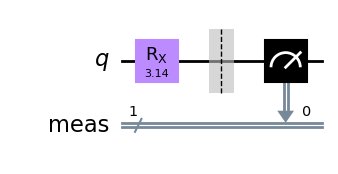

In [13]:
from qiskit.circuit import QuantumCircuit, Parameter

# create the parameter
phi = Parameter('phi')
qc = QuantumCircuit(1)

# parameterize the rotation
qc.rx(phi, 0)
qc.draw('mpl')

# bind the parameters after circuit to create a bound circuit
bc = qc.bind_parameters({phi: 3.14})
bc.measure_all()
bc.draw('mpl')

# Example of NLocal Circuits & Data Encoding Circuits

In [3]:
# TwoLocal
from qiskit.circuit.library import TwoLocal
qc_13 = TwoLocal(3, rotation_blocks='ry',
                 entanglement_blocks='crz', entanglement='sca',
                 reps=3, skip_final_rotation_layer=True,
                 insert_barriers=True)

qc_13.decompose().draw()

┌──────────┐ ░ ┌──────────┐                         ░ ┌──────────┐ ░ »
q_0: ┤ Ry(θ[0]) ├─░─┤ Rz(θ[3]) ├─────■───────────────────░─┤ Ry(θ[6]) ├─░─»
     ├──────────┤ ░ └────┬─────┘┌────┴─────┐             ░ ├──────────┤ ░ »
q_1: ┤ Ry(θ[1]) ├─░──────┼──────┤ Rz(θ[4]) ├─────■───────░─┤ Ry(θ[7]) ├─░─»
     ├──────────┤ ░      │      └──────────┘┌────┴─────┐ ░ ├──────────┤ ░ »
q_2: ┤ Ry(θ[2]) ├─░──────■──────────────────┤ Rz(θ[5]) ├─░─┤ Ry(θ[8]) ├─░─»
     └──────────┘ ░                         └──────────┘ ░ └──────────┘ ░ »
«                              ┌───────────┐ ░ ┌───────────┐ ░              »
«q_0: ──────────────────■──────┤ Rz(θ[11]) ├─░─┤ Ry(θ[12]) ├─░───────■──────»
«     ┌──────────┐      │      └─────┬─────┘ ░ ├───────────┤ ░ ┌─────┴─────┐»
«q_1: ┤ Rz(θ[9]) ├──────┼────────────■───────░─┤ Ry(θ[13]) ├─░─┤ Rz(θ[15]) ├»
«     └────┬─────┘┌─────┴─────┐              ░ ├───────────┤ ░ └───────────┘»
«q_2: ─────■──────┤ Rz(θ[10]) ├──────────────░─┤ Ry(θ[14]) ├─░──────────────»
«                 └───────────┘              ░ └───────────┘ ░              »
«                  ┌───────────┐
«q_0: ─────────────┤ Rz(θ[17]) ├
«                  └─────┬─────┘
«q_1: ──────■────────────┼──────
«     ┌─────┴─────┐      │      
«q_2: ┤ Rz(θ[16]) ├──────■──────
«     └───────────┘

In [4]:
from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw()

┌──────────┐ ░                                                 »
q_0: ┤ Ry(θ[0]) ├─░──────■──────────────────────────────────────────»
     ├──────────┤ ░ ┌────┴─────┐                                    »
q_1: ┤ Rz(θ[1]) ├─░─┤ Rx(θ[6]) ├─────■───────────────────────■──────»
     ├──────────┤ ░ └──────────┘┌────┴─────┐            ┌────┴─────┐»
q_2: ┤ Ry(θ[2]) ├─░─────────────┤ Rx(θ[7]) ├─────■──────┤ Rx(θ[9]) ├»
     ├──────────┤ ░             └──────────┘┌────┴─────┐└──────────┘»
q_3: ┤ Rz(θ[3]) ├─░─────────────────────────┤ Rx(θ[8]) ├────────────»
     ├──────────┤ ░                         └──────────┘            »
q_4: ┤ Ry(θ[4]) ├─░─────────────────────────────────────────────────»
     ├──────────┤ ░                                                 »
q_5: ┤ Rz(θ[5]) ├─░─────────────────────────────────────────────────»
     └──────────┘ ░                                                 »
«                                                                      
«q_0: ─────────────────────────────────────────────────────────────────
«                                                                      
«q_1: ─────────────────────────────────────────────────────────────────
«                                                                      
«q_2: ──────■─────────────────────────■────────────────────────────────
«     ┌─────┴─────┐             ┌─────┴─────┐                          
«q_3: ┤ Rx(θ[10]) ├──────■──────┤ Rx(θ[12]) ├──────■───────────────────
«     └───────────┘┌─────┴─────┐└───────────┘┌─────┴─────┐             
«q_4: ─────────────┤ Rx(θ[11]) ├─────────────┤ Rx(θ[13]) ├──────■──────
«                  └───────────┘             └───────────┘┌─────┴─────┐
«q_5: ────────────────────────────────────────────────────┤ Rx(θ[14]) ├
«                                                         └───────────┘

In [5]:
# NLocal
from qiskit.circuit.library import NLocal
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

# rotation block:
rot = QuantumCircuit(4)
params = ParameterVector('r', 3)
rot.ry(params[0], 0)
rot.rz(params[1], 1)
rot.rx(params[2], 2)
rot.rx(params[2], 3)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='sca',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw()

┌──────────┐ ░                         ┌──────────┐            »
q_0: ┤ Ry(θ[0]) ├─░─────────────────────────┤ Rx(θ[5]) ├─────■──────»
     ├──────────┤ ░                         └────┬─────┘┌────┴─────┐»
q_1: ┤ Rz(θ[1]) ├─░──────────────────────────────┼──────┤ Rx(θ[6]) ├»
     ├──────────┤ ░                              │      └──────────┘»
q_2: ┤ Rx(θ[2]) ├─░──────────────────────────────┼──────────────────»
     ├──────────┤ ░                              │                  »
q_3: ┤ Rx(θ[2]) ├─░──────■───────────────────────┼──────────────────»
     └──────────┘ ░ ┌────┴─────┐                 │                  »
q_4: ─────────────░─┤ Rx(θ[3]) ├─────■───────────┼──────────────────»
                  ░ └──────────┘┌────┴─────┐     │                  »
q_5: ─────────────░─────────────┤ Rx(θ[4]) ├─────■──────────────────»
                  ░             └──────────┘                        »
«                                                                   »
«q_0: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_1: ─────■───────────────────────■────────────────────────────────»
«     ┌────┴─────┐            ┌────┴─────┐                          »
«q_2: ┤ Rx(θ[7]) ├─────■──────┤ Rx(θ[9]) ├──────■───────────────────»
«     └──────────┘┌────┴─────┐└──────────┘┌─────┴─────┐             »
«q_3: ────────────┤ Rx(θ[8]) ├────────────┤ Rx(θ[10]) ├──────■──────»
«                 └──────────┘            └───────────┘┌─────┴─────┐»
«q_4: ─────────────────────────────────────────────────┤ Rx(θ[11]) ├»
«                                                      └───────────┘»
«q_5: ──────────────────────────────────────────────────────────────»
«                                                                   »
«                                            
«q_0: ───────────────────────────────────────
«                                            
«q_1: ───────────────────────────────────────
«                                            
«q_2: ──────■────────────────────────────────
«     ┌─────┴─────┐                          
«q_3: ┤ Rx(θ[12]) ├──────■───────────────────
«     └───────────┘┌─────┴─────┐             
«q_4: ─────────────┤ Rx(θ[13]) ├──────■──────
«                  └───────────┘┌─────┴─────┐
«q_5: ──────────────────────────┤ Rx(θ[14]) ├
«                               └───────────┘

# ZZ encoding

In [6]:
# data encoding
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘